<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px
            ">
<p style="padding: 10px;
          color:red;
          font-size:120%;
          text-align:center;">
 Payam Amanat


</p>

</div>

<center>
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRFvwkNafIcPg0fdrdnXI9JhmA3a1loR9kiTsOsRv5HYYqL5wcaqzbM90fvWLgO9sR0qOU&usqp=CAU' width=800 height=500 />
</center>

<a id="1.1"></a>
<h2 style="font-family: Verdana; font-size: 28px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: black; background-color: #ffffff; text-align:center"><b>Notebook- </b> Abstraction </h2>

<div style="font-family:Verdana; background-color:aliceblue; padding:30px; font-size:17px;color:#034914">

* In this project we will use of different Models of Classification for binary prediction . <br>
* The objective of this project is : <br>

1: Loading dataset<br>
2: EDA<br>
3: Cleaning text<br>
4: Tokenization<br>
5: Lemmatization method<br>
6: Using both CounterVectorizer and TI-IDF<br>
7: Using classification models<br>
</div>

### Loading necessary libraries

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import warnings
import nltk


from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer , PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

sns.set(style='darkgrid',font_scale=1.5)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns',None)
pd.set_option('display.precision', 8)

warnings.filterwarnings('ignore')

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Loading Dataset
</p>
</div>

In [2]:
train_df = pd.read_csv(r'C:\Users\payama\Desktop\NLP\nlp-getting-started\train.csv')
test_df= pd.read_csv(r'C:\Users\payama\Desktop\NLP\nlp-getting-started\test.csv')

In [3]:
train_df.head(20)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Basic Understanding of Dataset
</p>
</div>

### Shape of Train and Test dataset

In [4]:
print(f'Train dataset shape : {train_df.shape}')
print('--'*20)
print(f'Test dataset shape : {test_df.shape}')

Train dataset shape : (7613, 5)
----------------------------------------
Test dataset shape : (3263, 4)


### Features in Train and Test dataset

In [5]:
print(f'Train data : {train_df.columns}')
print('----'*20)
print(f'Test data : {test_df.columns}')

Train data : Index(['id', 'keyword', 'location', 'text', 'target'], dtype='object')
--------------------------------------------------------------------------------
Test data : Index(['id', 'keyword', 'location', 'text'], dtype='object')


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Exploratory Data Analysis (EDA)
</p>
</div>

### Checking duplicated text for both Train and Test dataset

In [6]:
print('The number of dublicated data in Train dataset :' ,train_df.duplicated(['text']).sum())
print('---'*20)
print('The number of dublicated data in Test dataset : ', train_df.duplicated(['text']).sum())


The number of dublicated data in Train dataset : 110
------------------------------------------------------------
The number of dublicated data in Test dataset :  110


### Removing duplicated texts from both Train and Test dataset

In [7]:
train_df.drop_duplicates(["text", "target"], inplace=True)
test_df.drop_duplicates(["text"], inplace=True)

### Checking dtypes for both Train and Test dataset

In [8]:
print(f'Train features dtypes \n{train_df.dtypes}')
print('-'*20)
print(f'Test features dtypes \n{test_df.dtypes}')

Train features dtypes 
id           int64
keyword     object
location    object
text        object
target       int64
dtype: object
--------------------
Test features dtypes 
id           int64
keyword     object
location    object
text        object
dtype: object


### Missing values in Train dataset

In [9]:
print("Missin values in Train dataset : ")
null_data = train_df.isnull().sum().to_frame().rename(columns={0:'Miss values'})
null_data["Miss values percentage %"] = train_df.isnull().sum() * 100 / len(train_df)
null_data.style

Missin values in Train dataset : 


,Miss values,Miss values percentage %
id,0,0.000000
keyword,56,0.744582
location,2490,33.107300
text,0,0.000000
target,0,0.000000


### Missing values in Test dataset

In [10]:
print("Missin values in Test dataset : ")
null_data = test_df.isnull().sum().to_frame().rename(columns={0:'Miss values'})
null_data["Miss values percentage %"] = round(test_df.isnull().sum() * 100 / len(train_df),2)
null_data.style

Missin values in Test dataset : 


,Miss values,Miss values percentage %
id,0,0.000000
keyword,26,0.350000
location,1097,14.590000
text,0,0.000000


### Showing target feature percentage 

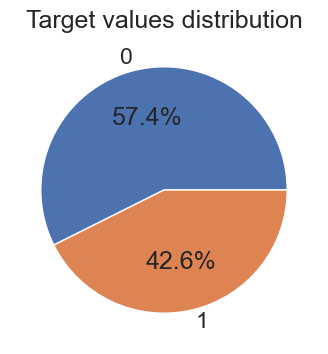

In [11]:
plt.figure(figsize=(6,4))
plt.pie(train_df["target"].value_counts(), labels= train_df["target"].value_counts().keys(),autopct='%1.1f%%')
plt.title('Target values distribution')
plt.show()

### Checking each keywords and their len 

In [12]:
print(f'Train keyword len : {len(train_df.keyword.value_counts(normalize=True))}')
train_df['keyword'].value_counts()

Train keyword len : 221


fatalities               45
deluge                   42
armageddon               42
damage                   41
body%20bags              41
harm                     41
windstorm                40
twister                  40
siren                    40
evacuate                 40
fear                     40
flames                   39
famine                   39
collision                39
earthquake               39
explosion                39
outbreak                 39
sinkhole                 39
sinking                  39
sunk                     39
weapon                   39
weapons                  39
whirlwind                39
collided                 39
wrecked                  39
blaze                    38
upheaval                 38
drowned                  38
thunder                  38
flooding                 38
explode                  38
derailed                 38
fire                     38
bombed                   38
ambulance                38
oil%20spill         

### Checking keywords (disaster or not)

In [13]:
keyword_values=pd.crosstab(train_df['keyword'] , train_df['target'])
keyword_values.sort_values(by=[1,0], ascending=[False,True] )[:20]

target,0,1
keyword,,
outbreak,1,38
debris,0,37
wreckage,0,37
oil%20spill,1,37
typhoon,1,35
derailment,0,33
evacuated,4,32
suicide%20bombing,1,31
nuclear%20disaster,3,31


### Showing Top Ten Keywords (Used)

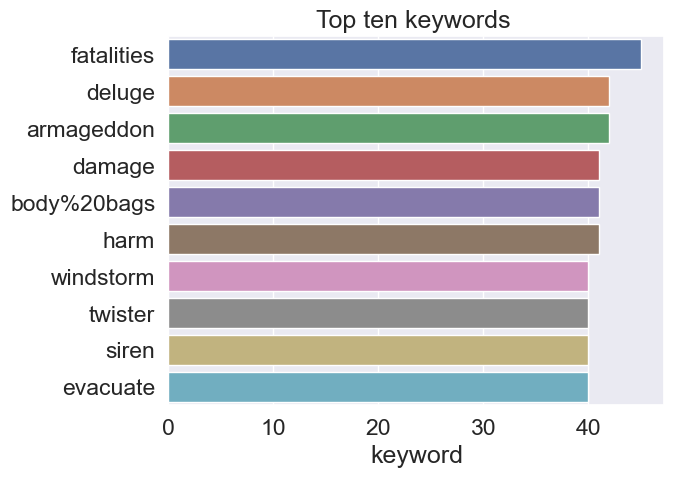

In [14]:
sns.barplot(y=train_df['keyword'].value_counts()[:10].index,x=train_df['keyword'].value_counts()[:10],
            orient='h')
plt.title("Top ten keywords ")
plt.show()

### trimming all locations names

In [15]:
train_df['location'].replace({


                           'New York':'USA',
                           'United States':'USA',
                            "Florida":'USA',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                            "Chicago, IL":'USA',
                            "Chicago":'USA',
                            "San Francisco":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Los Angeles":'USA',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "New York City":'USA',
                            "Atlanta, GA":'USA',
                            "Texas":'USA',

                            "Ireland":'UK',"London, England":'UK',
                            "London, UK":'UK',
                            "London":'UK',
                            "United Kingdom":'UK',

                            "Nigeria":'Africa',
                            "Kenya":'Africa',

                            "Everywhere":'Somewehere',
                            "Earth":'Somewehere', 
                            

                            "Mumbai":"India", 

                            "Toronto":'Canada'

                            },inplace=True)

### Showing Top Ten Locations

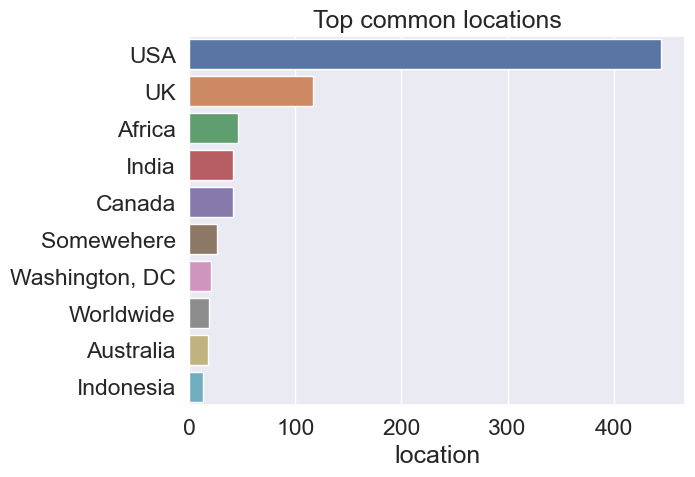

In [16]:
sns.barplot(y=train_df['location'].value_counts()[:10].index , x=train_df['location'].value_counts()[:10] ,orient='h')
plt.title('Top common locations')
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Data Pre-Processing
</p>
</div>

### Cleaning text

In [17]:
def text_cleaner(text):
    
    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text 

train_df['text']=train_df['text'].apply(lambda x :text_cleaner(x))
test_df['text']=test_df['text'].apply(lambda x :text_cleaner(x))

In [18]:
train_df['text'].sample(10)

4022    i added a video to a youtube playlist  ori and...
6628    captured terrorist naved not registered as our...
5216    why did god order obliteration of ancient cana...
3607    robert ballews log statements are always at th...
5333    pandemonium in aba as woman delivers baby with...
1619    spot fixingmatch fixing anyoneor it has to be ...
1801                fatal crash reported on johns island 
680     montgomery come for the blazing hot weathersta...
2907             my parents dont believe in the dream sad
2769     from devastation to elation getting back on m...
Name: text, dtype: object

In [19]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


### Tokenization process

In [20]:
Tokenizer=RegexpTokenizer(r'\w+')
train_df['text']=train_df['text'].apply(lambda x : Tokenizer.tokenize(x))
test_df['text']=test_df['text'].apply(lambda x : Tokenizer.tokenize(x))

In [21]:
train_df.sample(10)

,id,keyword,location,text,target
3469,4962,explosion,UK,"[ee, recalls, power, bar, phone, chargers, aft...",1
278,406,apocalypse,USA,"[honeybunzgem, primalkitchen, i, feel, like, m...",0
2765,3973,devastation,Vancouver BC,"[is, this, country, latin, americas, next, arg...",0
4824,6867,mass%20murder,"Melbourne, Australia","[hiroshima, one, of, historys, worst, examples...",1
2231,3190,deluge,"Atlanta, Ga","[only, shadowman, can, save, the, big, easy, f...",0
7419,10612,wounded,NaN,"[police, officer, wounded, suspect, dead, afte...",1
1466,2114,catastrophe,NaN,"[failure, is, a, misfortunebut, regret, is, a,...",0
5499,7848,quarantined,NaN,"[when, you, are, quarantined, to, a, little, c...",0
4270,6066,heat%20wave,NaN,"[chilli, heat, wave, doritos, never, fail]",0
7403,10591,wounded,"Paterson, New Jersey","[officer, wounded, suspect, killed, in, exchan...",1


### Downloading momentous packeges

In [22]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\payama\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\payama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\payama\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\payama\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### lemmatization processing and pasting words together

In [23]:

# lemmatizer = WordNetLemmatizer() we can use lemmatizer 
Stemmer = PorterStemmer()
def stopwords_cleaner(text):

    stopwords_list = stopwords.words('english')
    # word = [lemmatizer.lemmatize(letter) for letter in text if letter not in stopwords_list]
    word = [Stemmer.stem(letter) for letter in text if letter not in stopwords_list]
    peasting = ' '.join(word)
    return peasting


train_df['text'] = train_df['text'].apply(lambda x : stopwords_cleaner(x))
test_df['text'] = test_df['text'].apply(lambda x : stopwords_cleaner(x))

In [24]:
train_df['text'].sample(10)

276                                       apocalyps pleas
2478    thank lot roadwork men co tube strike wasnt di...
3428                                         peopl explod
1346    never support loot burn build see peopl fight ...
4171    malistkiss sunni continu believ righteou conti...
3586      man accus fatal hitandrun get new judg via khqa
3519    lone survivor eyewit account oper redw lost he...
105     victori bargain basement price dwight david ei...
2766                                   devast smash phone
2763    havent seen devast corp breach yet prepar get ...
Name: text, dtype: object

### Using CounterVectorizer on our text

In [25]:
count_vectorizer=CountVectorizer()
train_vectors=count_vectorizer.fit_transform(train_df['text'])

test_vectors = count_vectorizer.transform(test_df["text"])


print(train_vectors[0].todense())

[[0 0 0 ... 0 0 0]]


<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:black;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:white;
          font-size:120%;
          text-align:center;">
Model Building 
</p>
</div>

### Spliting data to train and test (CounterVectorizer)

In [26]:
X_train , X_test , y_train , y_test  = train_test_split(train_vectors , train_df['target'] , test_size=0.1 , random_state=1)


### Using TfidfVectorizer on our text

In [27]:
tfidf=TfidfVectorizer(min_df=2,max_df=0.5,ngram_range=(1,2))

train_tfidf=tfidf.fit_transform(train_df['text'])
test_tfidf = tfidf.transform(test_df["text"])

### Spliting data to train and test (TF_IDF)

In [28]:
X_test_tf , X_train_tf , y_test_tf , y_train_tf = train_test_split(train_tfidf , train_df['target'] , test_size=0.1 , random_state=1)

In [29]:
training_score_vectorizer=[]
testing_score_vectorizer =[]

def model_prediction(model):
    model.fit(X_train,y_train)
    x_train_pred = model.predict(X_train)
    x_test_pred = model.predict(X_test)
    a = accuracy_score(y_train,x_train_pred)*100
    b = accuracy_score(y_test,x_test_pred)*100
    training_score_vectorizer.append(a)
    testing_score_vectorizer .append(b)
    model_name = str(model).split('(')[0]
    print(f"Accuracy_Score of {model_name} model on Training Data is:",a)
    print(f"Accuracy_Score of {model_name} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model_name} model is:",precision_score(y_test,x_test_pred))
    print(f"Recall Score of {model_name} model is:",recall_score(y_test,x_test_pred))
    print(f"F1 Score of {model_name} model is:",f1_score(y_test,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model_name} model is:")
    cm = confusion_matrix(y_test,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of LogisticRegression model on Training Data is: 95.13888888888889
Accuracy_Score of LogisticRegression model on Testing Data is: 80.34528552456838

------------------------------------------------------------------------
Precision Score of LogisticRegression model is: 0.8082191780821918
Recall Score of LogisticRegression model is: 0.7195121951219512
F1 Score of LogisticRegression model is: 0.7612903225806452

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression model is:


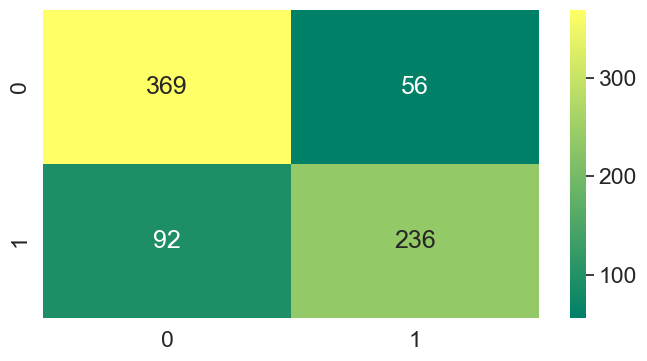

In [30]:
LogesticReg_CounetrVectorizer=LogisticRegression()
model_prediction(LogesticReg_CounetrVectorizer)

Accuracy_Score of RandomForestClassifier model on Training Data is: 98.72931442080379
Accuracy_Score of RandomForestClassifier model on Testing Data is: 79.2828685258964

------------------------------------------------------------------------
Precision Score of RandomForestClassifier model is: 0.8257575757575758
Recall Score of RandomForestClassifier model is: 0.6646341463414634
F1 Score of RandomForestClassifier model is: 0.7364864864864866

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier model is:


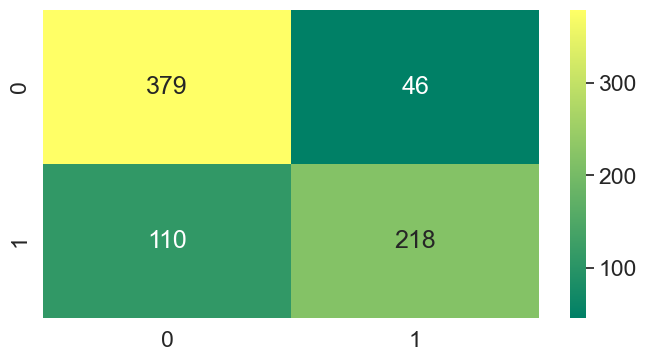

In [31]:
RandomForset_CounterVectorizer=RandomForestClassifier(n_estimators=100)
model_prediction(RandomForset_CounterVectorizer)

Accuracy_Score of MultinomialNB model on Training Data is: 90.51418439716312
Accuracy_Score of MultinomialNB model on Testing Data is: 79.4156706507304

------------------------------------------------------------------------
Precision Score of MultinomialNB model is: 0.7873754152823921
Recall Score of MultinomialNB model is: 0.7225609756097561
F1 Score of MultinomialNB model is: 0.753577106518283

------------------------------------------------------------------------
Confusion Matrix of MultinomialNB model is:


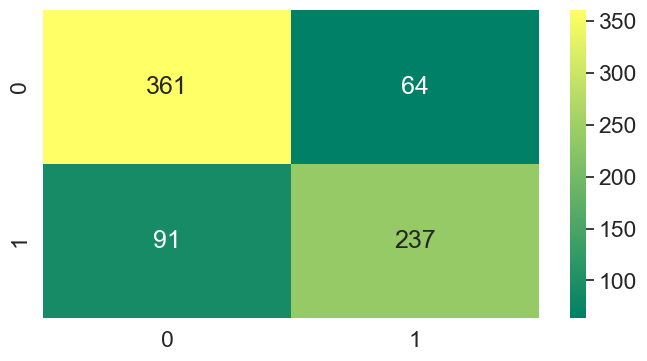

In [32]:
Gussian_CounterVectorizer=MultinomialNB()
model_prediction(Gussian_CounterVectorizer)

Accuracy_Score of SVC model on Training Data is: 94.59219858156028
Accuracy_Score of SVC model on Testing Data is: 81.27490039840637

------------------------------------------------------------------------
Precision Score of SVC model is: 0.8582375478927203
Recall Score of SVC model is: 0.6829268292682927
F1 Score of SVC model is: 0.7606112054329373

------------------------------------------------------------------------
Confusion Matrix of SVC model is:


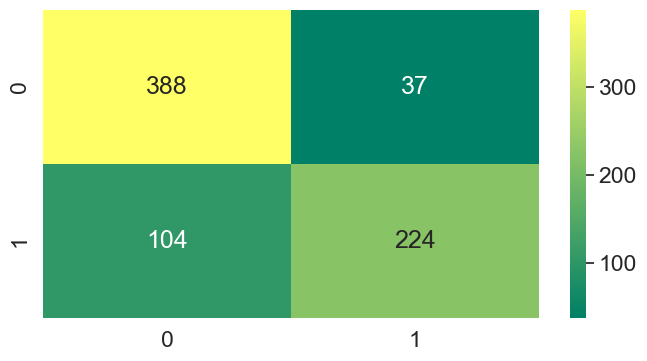

In [33]:
SVC_CounterVectorizer=SVC()
model_prediction(SVC_CounterVectorizer)

Accuracy_Score of XGBClassifier model on Training Data is: 83.59929078014184
Accuracy_Score of XGBClassifier model on Testing Data is: 78.35325365205843

------------------------------------------------------------------------
Precision Score of XGBClassifier model is: 0.8160919540229885
Recall Score of XGBClassifier model is: 0.649390243902439
F1 Score of XGBClassifier model is: 0.7232597623089982

------------------------------------------------------------------------
Confusion Matrix of XGBClassifier model is:


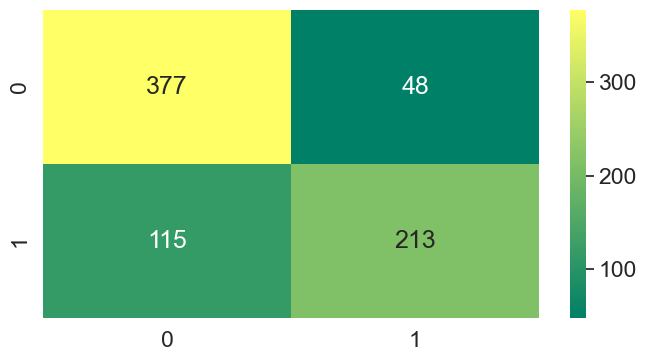

In [34]:
XGB_CounterVectorizer=XGBClassifier()
model_prediction(XGB_CounterVectorizer)

### Observing all models Performance for CounterVectorizer

In [35]:
models_vectorizer = ["Logistic Regression","Random Forest","Naive Bayes","SVM"
          ,"XGBoost"]

In [36]:
df_vectorizer = pd.DataFrame({"Algorithms":models_vectorizer,
                   "Training Score":training_score_vectorizer,
                   "Testing Score":testing_score_vectorizer})

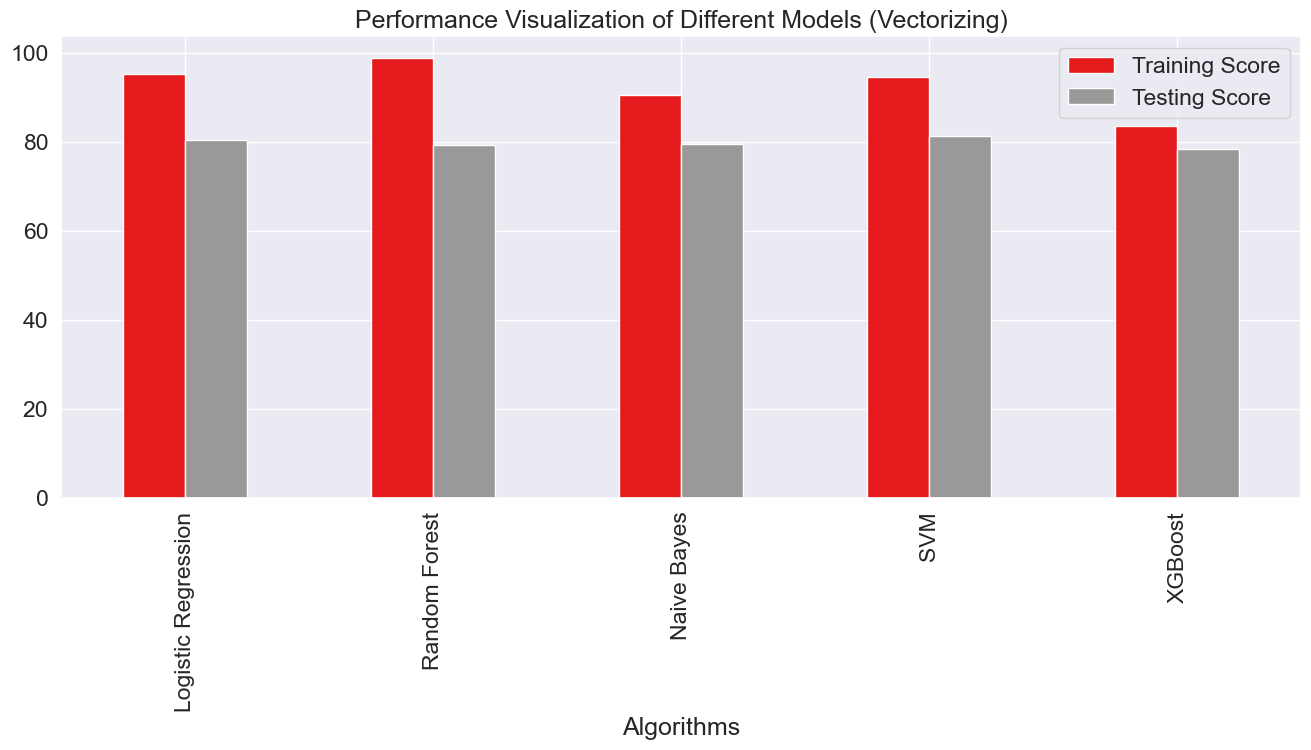

In [37]:
df_vectorizer.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models (Vectorizing)",colormap="Set1")
plt.show()

In [38]:
training_score_tf =[]
testing_score_tf =[]

def model_prediction_tf(model):
    model.fit(X_train_tf,y_train_tf)
    x_train_pred = model.predict(X_train_tf)
    x_test_pred = model.predict(X_test_tf)
    a = accuracy_score(y_train_tf,x_train_pred)*100
    b = accuracy_score(y_test_tf,x_test_pred)*100
    training_score_tf.append(a)
    testing_score_tf.append(b)
    model_name = str(model).split('(')[0]
    print(f"Accuracy_Score of {model_name} model on Training Data is:",a)
    print(f"Accuracy_Score of {model_name} model on Testing Data is:",b)
    print("\n------------------------------------------------------------------------")
    print(f"Precision Score of {model_name} model is:",precision_score(y_test_tf,x_test_pred))
    print(f"Recall Score of {model_name} model is:",recall_score(y_test_tf,x_test_pred))
    print(f"F1 Score of {model_name} model is:",f1_score(y_test_tf,x_test_pred))
    print("\n------------------------------------------------------------------------")
    print(f"Confusion Matrix of {model_name} model is:")
    cm = confusion_matrix(y_test_tf,x_test_pred)
    plt.figure(figsize=(8,4))
    sns.heatmap(cm,annot=True,fmt="g",cmap="summer")
    plt.show()

Accuracy_Score of LogisticRegression model on Training Data is: 95.0863213811421
Accuracy_Score of LogisticRegression model on Testing Data is: 70.99586288416076

------------------------------------------------------------------------
Precision Score of LogisticRegression model is: 0.8565861262665627
Recall Score of LogisticRegression model is: 0.381862404447533
F1 Score of LogisticRegression model is: 0.5282384042297524

------------------------------------------------------------------------
Confusion Matrix of LogisticRegression model is:


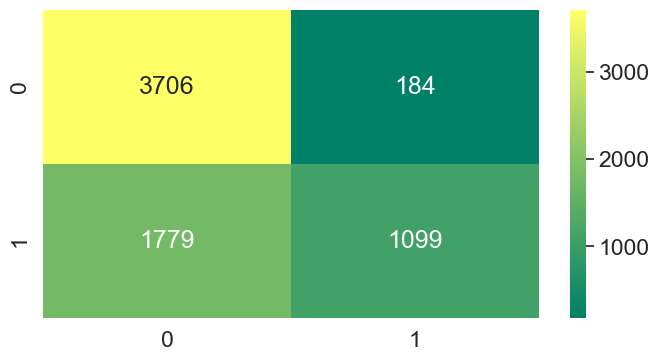

In [39]:
LogesticReg_tf=LogisticRegression()
model_prediction_tf(LogesticReg_tf)

Accuracy_Score of RandomForestClassifier model on Training Data is: 99.33598937583001
Accuracy_Score of RandomForestClassifier model on Testing Data is: 68.89775413711584

------------------------------------------------------------------------
Precision Score of RandomForestClassifier model is: 0.828936170212766
Recall Score of RandomForestClassifier model is: 0.33842946490618486
F1 Score of RandomForestClassifier model is: 0.4806316308906982

------------------------------------------------------------------------
Confusion Matrix of RandomForestClassifier model is:


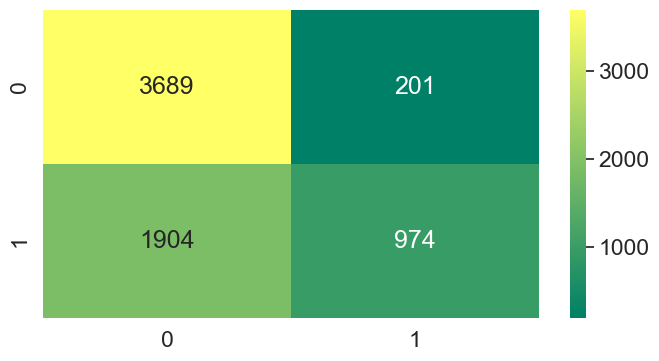

In [40]:
RandomForset_tf=RandomForestClassifier(n_estimators=100)
model_prediction_tf(RandomForset_tf)

Accuracy_Score of MultinomialNB model on Training Data is: 95.61752988047809
Accuracy_Score of MultinomialNB model on Testing Data is: 72.78368794326241

------------------------------------------------------------------------
Precision Score of MultinomialNB model is: 0.8213399503722084
Recall Score of MultinomialNB model is: 0.4600416956219597
F1 Score of MultinomialNB model is: 0.5897550111358574

------------------------------------------------------------------------
Confusion Matrix of MultinomialNB model is:


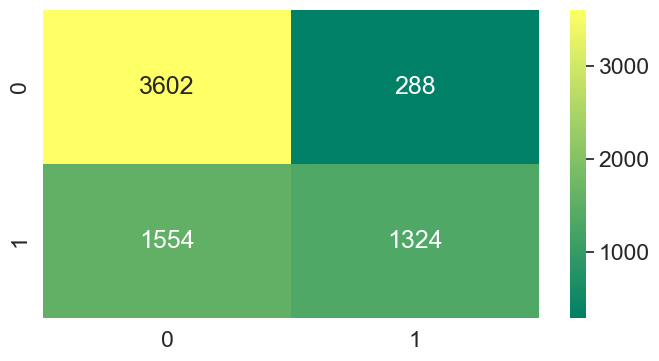

In [41]:
Gussian_tf=MultinomialNB()
model_prediction_tf(Gussian_tf)

Accuracy_Score of SVC model on Training Data is: 99.20318725099602
Accuracy_Score of SVC model on Testing Data is: 69.13416075650119

------------------------------------------------------------------------
Precision Score of SVC model is: 0.8863858961802155
Recall Score of SVC model is: 0.3144544822793607
F1 Score of SVC model is: 0.4642215952808413

------------------------------------------------------------------------
Confusion Matrix of SVC model is:


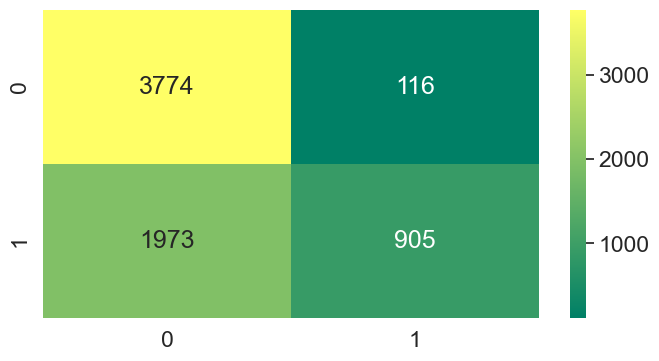

In [42]:
SVC_tf=SVC()
model_prediction_tf(SVC_tf)

Accuracy_Score of XGBClassifier model on Training Data is: 91.10225763612218
Accuracy_Score of XGBClassifier model on Testing Data is: 70.2127659574468

------------------------------------------------------------------------
Precision Score of XGBClassifier model is: 0.708011583011583
Recall Score of XGBClassifier model is: 0.509728978457262
F1 Score of XGBClassifier model is: 0.5927272727272728

------------------------------------------------------------------------
Confusion Matrix of XGBClassifier model is:


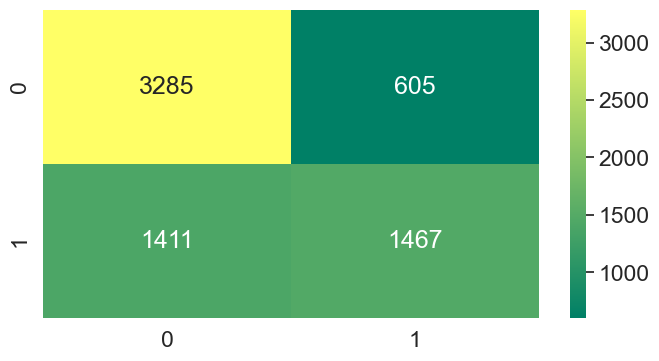

In [43]:
XGB_tf=XGBClassifier()
model_prediction_tf(XGB_tf)

### Observing all models Performance fot TF_IDF

In [44]:
models_tf = ["Logistic Regression","Random Forest","Naive Bayes","SVM"
          ,"XGBoost"]

In [45]:
df_tf = pd.DataFrame({"Algorithms":models_tf,
                   "Training Score":training_score_tf,
                   "Testing Score":testing_score_tf})

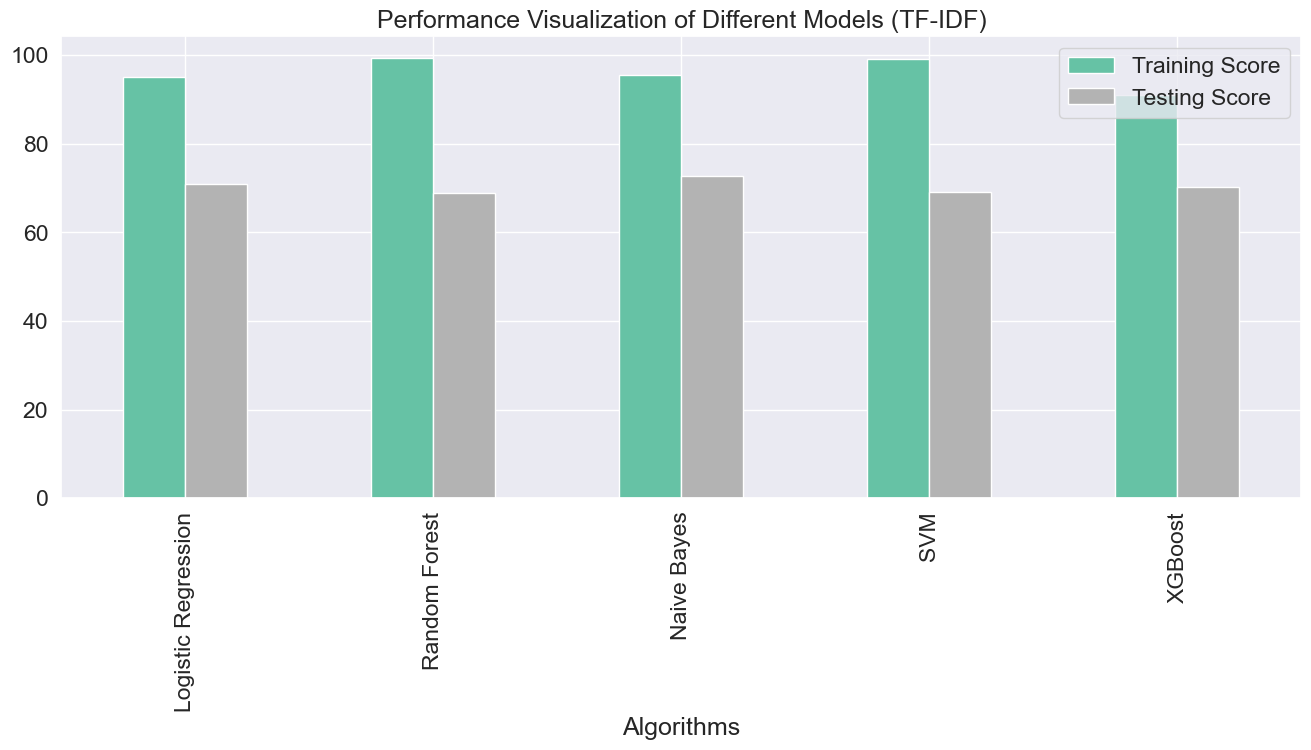

In [46]:
df_tf.plot(x="Algorithms",y=["Training Score","Testing Score"], figsize=(16,6),kind="bar",
        title="Performance Visualization of Different Models (TF-IDF)",colormap="Set2")
plt.show()

### Prediction for CounterVectorizer and Saving

In [50]:
Final_Model_CounterVector = SVC_CounterVectorizer.predict(test_vectors)
test_df['target'] = Final_Model_CounterVector 
test_df.to_csv('payamaaaaaaaaaaaa.csv')
test_df.sample(5)

,id,keyword,location,text,target
1150,3792,destruction,NaN,relat news bureaucrat singl hiroshima destruct...,1
1580,5334,fire,San Antonio,watch halt catch fire heaven place trakt,1
2082,6995,mayhem,SweizyLand,tonight go mayhem everybodi free w text st nw,0
1516,5048,eyewitness,Montreal,dutch crane collaps demolish hous dramat eyewi...,1
26,88,ablaze,NaN,nowplay alfon ablaz pul radio pulsradio,0


### Prediction for Tf_IDF and Saving

In [48]:
Final_Model_tf = SVC_tf.predict(test_tfidf)
test_df['target'] = Final_Model_tf 
# test_df.to_csv('address.csv')
test_df.sample(5)


,id,keyword,location,text,target
1097,3614,desolation,LanÌ¼s,want free desol despair,0
2741,9129,suicide%20bomb,Nigeria,bestnaijamad old pkk suicid bomber deton bomb ...,1
1084,3574,desolate,Cardiff/London/NYC/Warwick,roathboy im desol idea ill ever get badgeofhonour,0
744,2426,collide,"Lehigh Acres, FL",collid gateway student make set chair tabl fun...,0
1994,6718,lava,"Missouri, USA",psa misti make lava cake bestdayeva,0
